<a href="https://colab.research.google.com/github/Shruti-GiriK/Projects/blob/main/SmartWatch_Analysis_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart Watch Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

---
**About the Dataset**
---
Smartwatches have become ubiquitous, helping people to monitor various aspects of their fitness.Using this dataset, we can gain insights in users' activity patterns,and their sleep quality.


---
**Problem Statement**
---
Using smartwatches, we can track our movement, count of our steps taken, calories we have burnt, our sleep quality,our resting time and so on to make accurate predictions on the rating of a person's fitness.


---
# **Column Description**
1. **Id**:Unique Identification for user.
2. **Activity Date** : The date of which user did their activity.
3.  **TotalSteps**	: Total Number of steps the user has taken on the date.
4.  **TotalDistance**:Total distance covered by the user on the date.
5.  **TrackerDistance**:Total distance covered by the user when wearing the tracker.
6.	**LoggedActivitiesDistance**:DDistance from manually logged activities.
7.  **VeryActiveDistance**: Distance covered when highly active level.
8.  **ModeratelyActiveDistance**:Distance covered when moderately active level.
9.  **LightActiveDistance**	:Distance covered when light active level.
10. **SedentaryActiveDistance**	:Distance covered when least active.
11. **VeryActiveMinutes**:Miuntes spend at high activity.
12. **FairlyActiveMinutes**:Miuntes spend at moderate activity.
13. **LightlyActiveMinutes**:Miuntes spend at light activity.
14. **SedentaryMinutes**:Miuntes spend at least activity.
15. **Calories**: Calories burned on the date.

# **1.Understanding the Data Given**

In [ ]:
df=pd.read_csv('/content/dailyActivity_merged.csv')
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []


**No duplicate values.**

In [ ]:
df.shape

(940, 15)

# **2.Data Cleaning**

In [ ]:
df.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


**No null Values.**

# **3.Descriptive Statistics**

In [ ]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


# **4. Data Visualization**

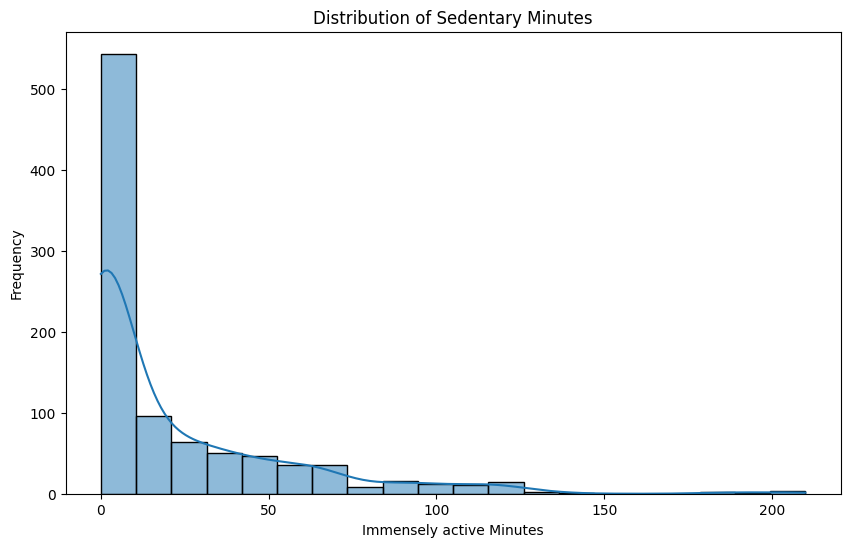

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VeryActiveMinutes'], bins=20, kde=True)
plt.title('Distribution of Sedentary Minutes')
plt.xlabel('Immensely active Minutes')
plt.ylabel('Frequency')
plt.show()


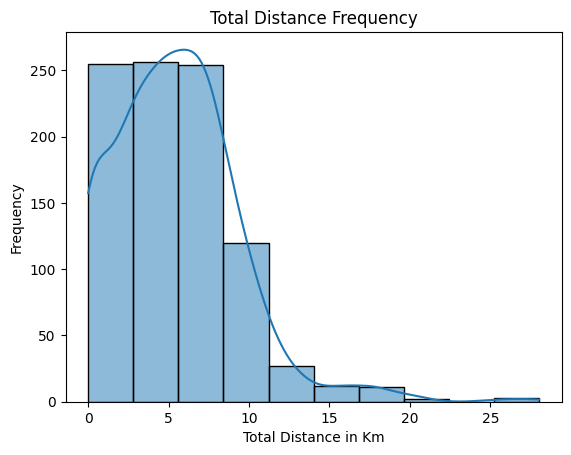

In [ ]:
sns.histplot(df['TotalDistance'],bins=10,kde=True)
plt.title('Total Distance Frequency')
plt.xlabel('Total Distance in Km')
plt.ylabel('Frequency')
plt.show()

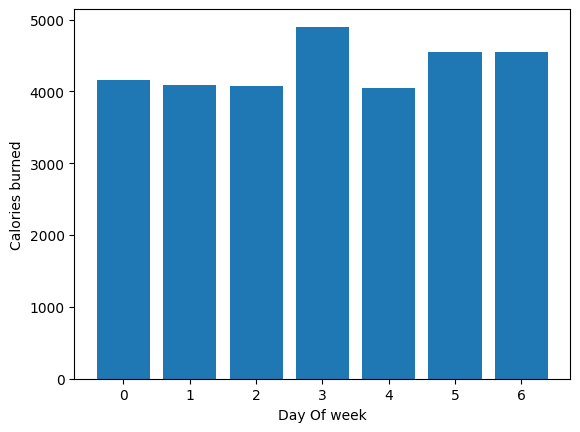

In [ ]:
plt.bar(df['Day of Week'],df['Calories'])
plt.xlabel('Day Of week')
plt.ylabel('Calories burned')
plt.show()

# **5. Feature Engineering**

Convert Date into DateTime format

In [ ]:
df['Date']=pd.to_datetime(df['ActivityDate'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Day of Week']=df['Date'].dt.dayofweek

df.drop('ActivityDate',axis=1,inplace=True)

In [ ]:
df.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,Month,Year,Day of Week
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,4,2016,1
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,4,2016,2
2,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,4,2016,3
3,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,4,2016,4
4,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,4,2016,5


New Features of total activity minutes

In [ ]:
df['Total Activity']=df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']

In [ ]:
df.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,Month,Year,Day of Week,Total Activity
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,4,2016,1,366
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,4,2016,2,257
2,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,4,2016,3,222
3,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,4,2016,4,272
4,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,4,2016,5,267


# **6. Correlation Analysis**

In [ ]:

df.drop('Year',axis=1,inplace=True)

*Dropped Year as it has the same repeated values, causing correlation values to be NaN*

<Axes: >

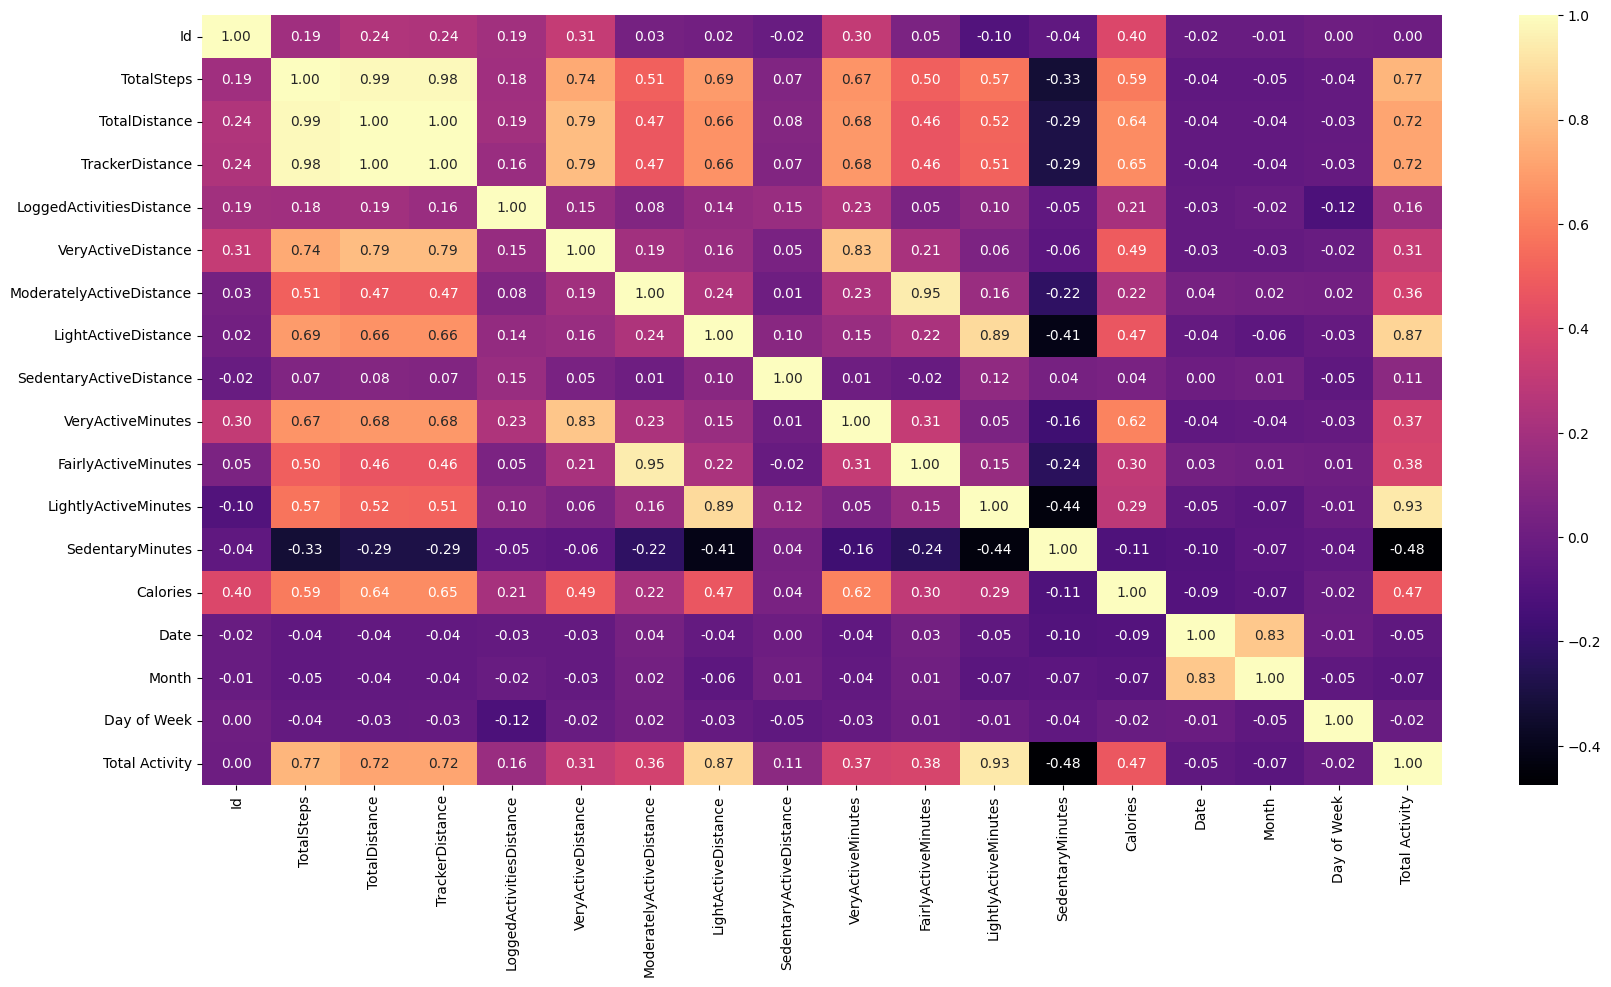

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,fmt='0.2f',cmap='magma',annot=True)

In [ ]:
df.drop(['LoggedActivitiesDistance','ModeratelyActiveDistance','SedentaryActiveDistance',
        'SedentaryMinutes','Date','Month','Day of Week'],axis=1,inplace=True)

In [ ]:
x=df.drop('Calories',axis=1)
y=df['Calories']
model=DecisionTreeRegressor()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.6394338008943574

# **7.Removing Outliers**

<Axes: >

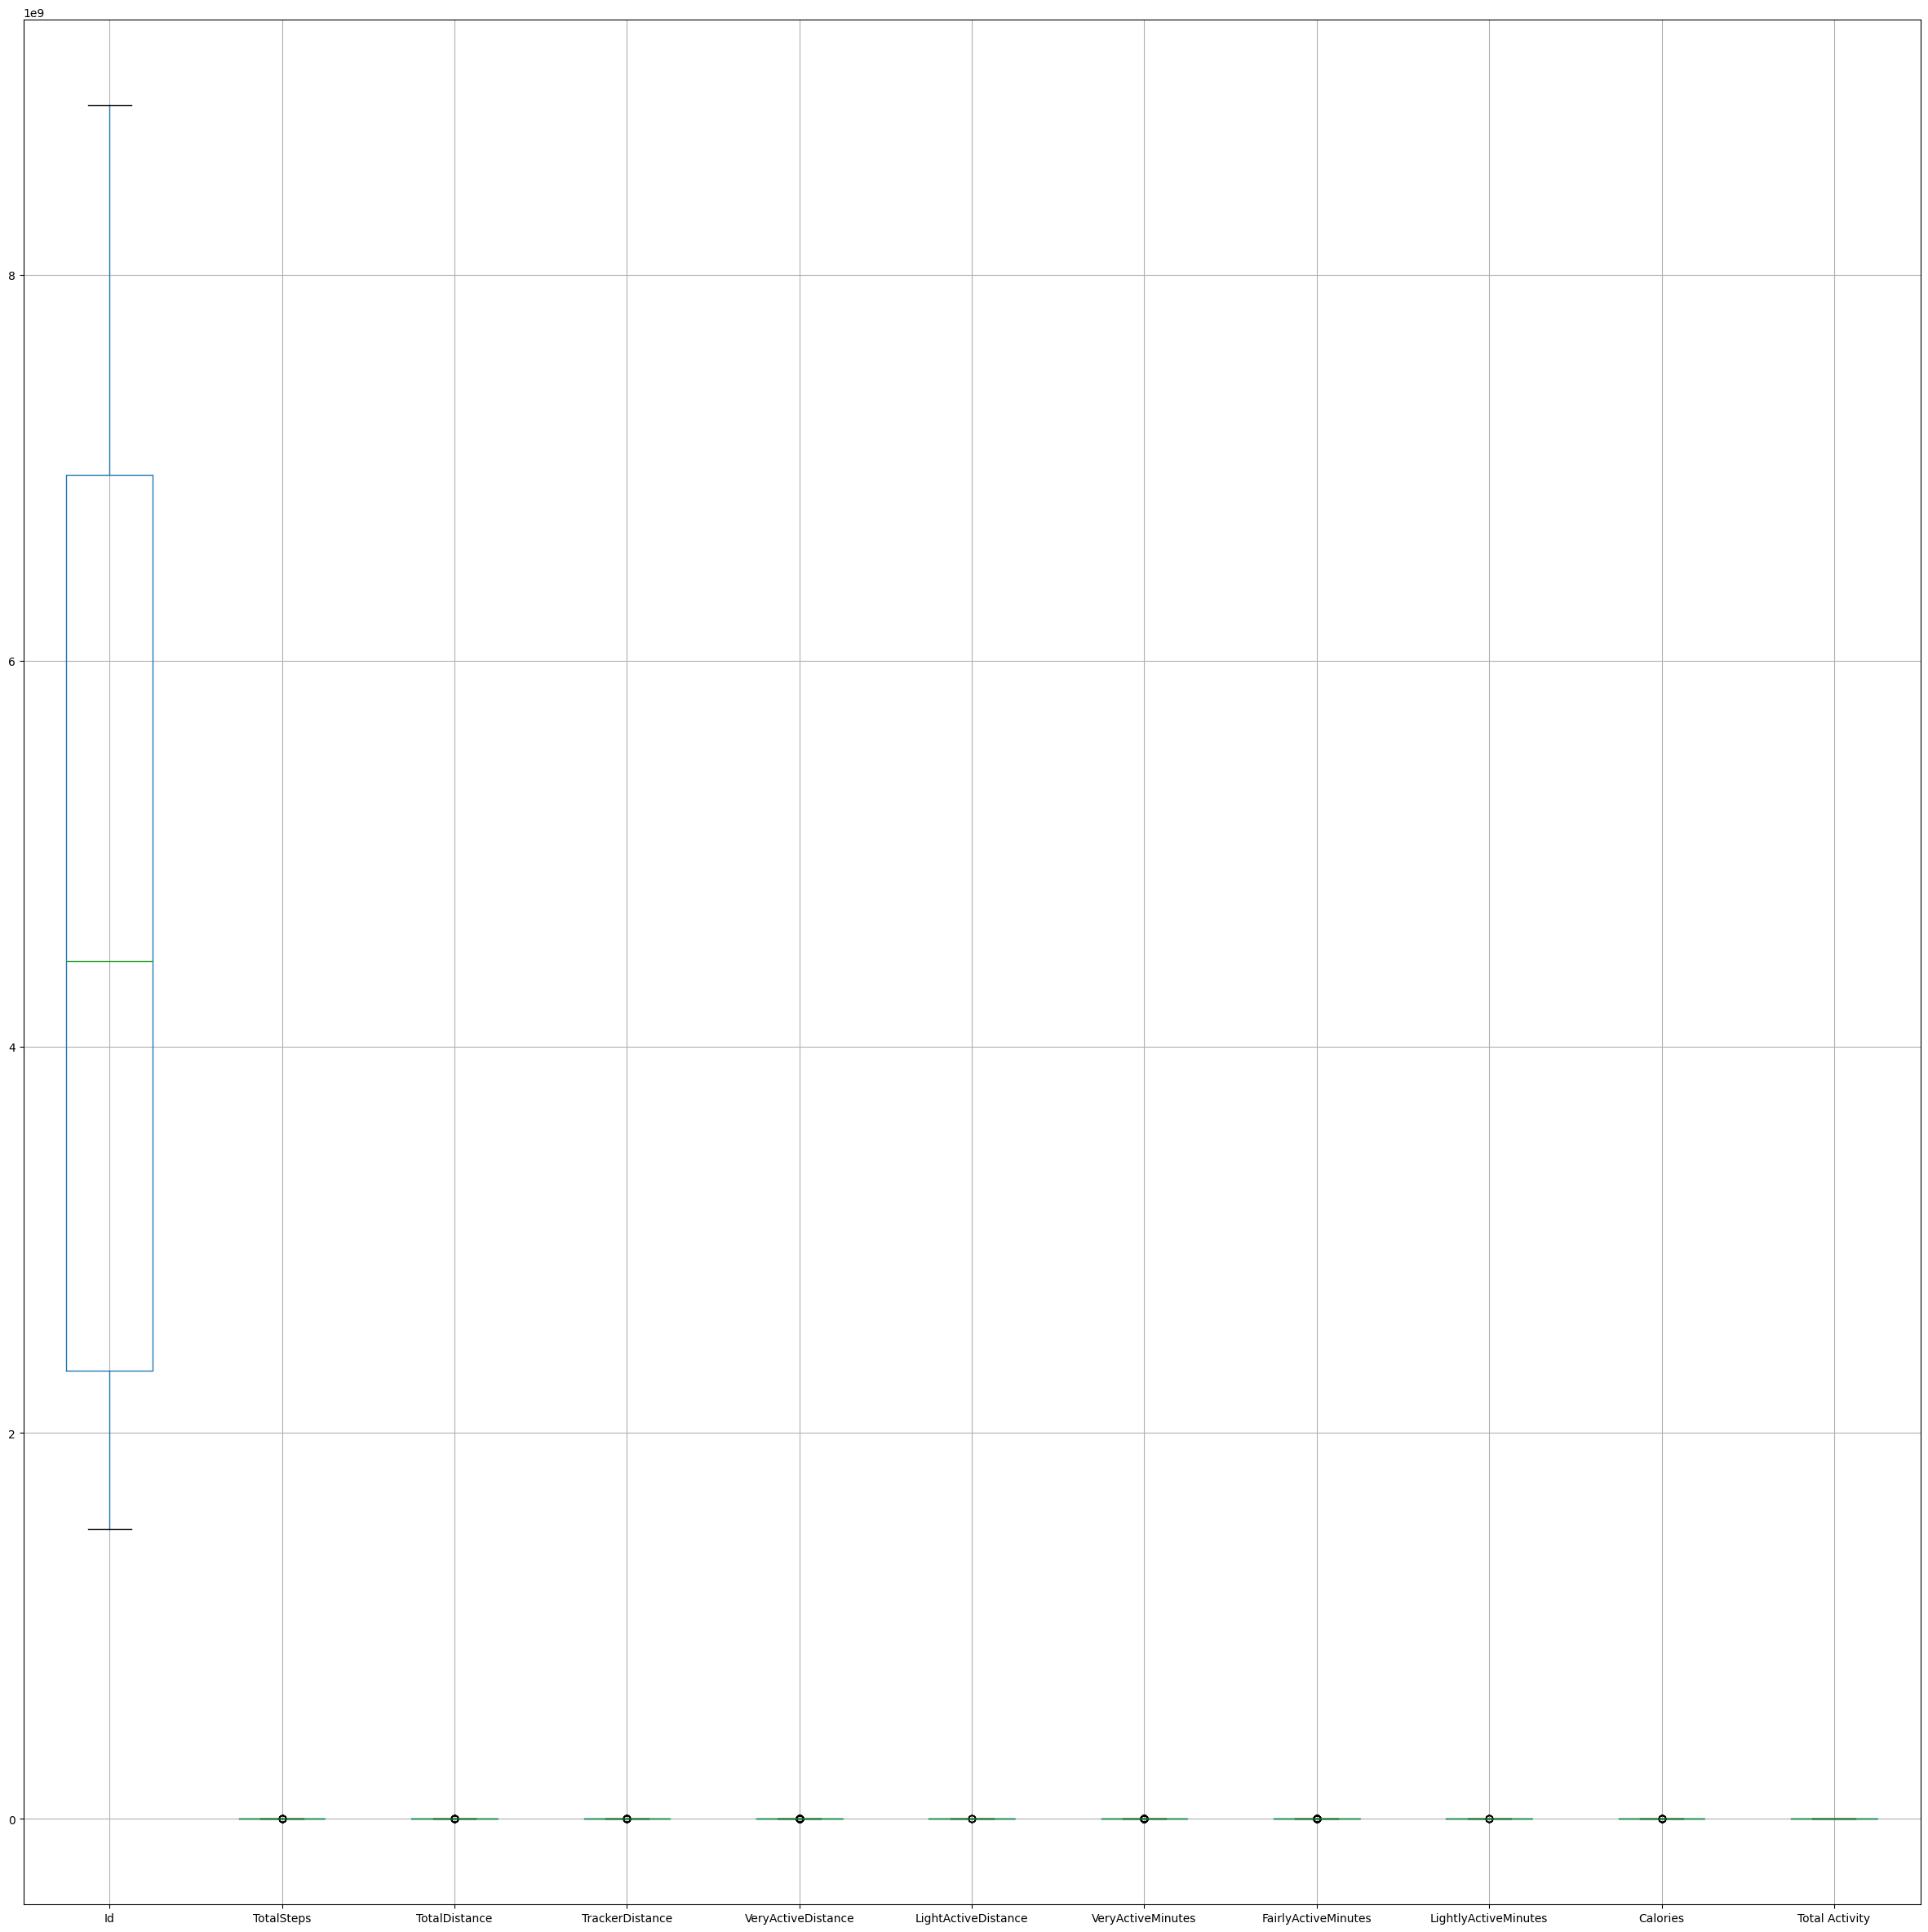

In [ ]:
plt.figure(figsize=(30,30))
df.boxplot()

**No Outliers Present**

# **8. Data Scaling**

In [ ]:
minmax=MinMaxScaler()
X_minmax=minmax.fit_transform(x)
xtrainm,xtestm,ytrainm,ytestm=train_test_split(X_minmax,y,random_state=42)
model.fit(xtrainm,ytrainm)
model.score(xtestm,ytestm)


0.5663896144079319

In [ ]:
standard=StandardScaler()
X_scaled=standard.fit_transform(x)
xtrains,xtests,ytrains,ytests=train_test_split(X_scaled,y,random_state=42)
model.fit(xtrains,ytrains)
model.score(xtests,ytests)

0.6154805510196957

Going to use Standard scaler has it has a higher score.

# **9.Model Selection**

In [ ]:
from sklearn.model_selection import KFold

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeRegressor()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None
best_y_pred = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(x), 1):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    model.fit(xtrain,ytrain)

    # Predict
    y_pred = model.predict(xtest)
    r2 = r2_score(ytest, y_pred)
    print(f"Fold {fold} Accuracy: {r2}")

    # Update best fold
    if r2 > best_accuracy:
        best_accuracy = r2
        best_fold = fold
        best_X_train = xtrain
        best_y_train = ytrain
        best_X_test = xtest
        best_y_test = ytest
        best_y_pred = y_pred

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.6304732083222326
Fold 2 Accuracy: 0.603629593854035
Fold 3 Accuracy: 0.7329457844384889
Fold 4 Accuracy: 0.5911143713159249
Fold 5 Accuracy: 0.5393147661127329

 Best Fold: 3 with Accuracy: 0.7329457844384889


In [ ]:
linear_model=LinearRegression()
linear_model.fit(best_X_train,best_y_train)
linear_model.score(best_X_test,best_y_test)

0.7618403769277019

In [ ]:
forest_model=RandomForestRegressor()
forest_model.fit(best_X_train,best_y_train)
forest_model.score(best_X_test,best_y_test)


0.7647634901124201

# **10. Report**


In [ ]:
y_pred=forest_model.predict(best_X_test)
r2=r2_score(best_y_test,y_pred)
r2

0.7647634901124201

**REPORT**:
1. The Accuracy is good with 0.76 proving to be mostly accurate in predictions.

**Storing the model as pickle file**

In [ ]:
import pickle

In [ ]:
filename='smartwatch.pkl'
with open(filename,'wb') as file:
  pickle.dump(forest_model,file)